In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [32]:

diabetes = pd.read_csv('/content/diabetes.csv')
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

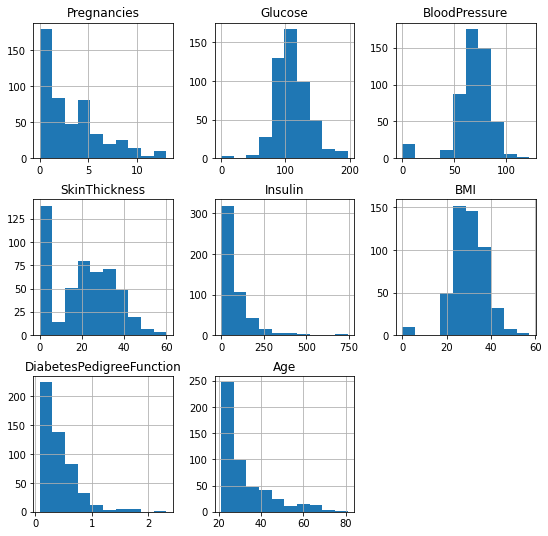

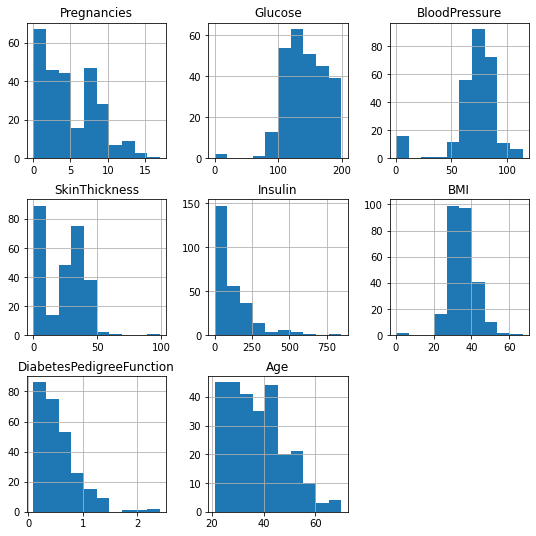

In [34]:
diabetes.groupby('Outcome').hist(figsize=(9,9))

In [35]:

diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count()
diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count()
diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count()
diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count()

diabetes_mod = diabetes[(diabetes.BloodPressure !=0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

In [37]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

x = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

In [38]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = diabetes_mod.Outcome, random_state = 0)

In [40]:
names = []
scores = []

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
tr_split = pd.DataFrame({'Name': names, 'Score':scores})
print(tr_split)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


  Name     Score
0  KNN  0.729282
1  SVC  0.740331
2   LR  0.762431
3   DT  0.718232
4  GNB  0.734807
5   RF  0.784530
6   GB  0.773481


In [41]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, x, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

  Name     Score
0  KNN  0.714136
1  SVC  0.755651
2   LR  0.763813
3   DT  0.689498
4  GNB  0.754205
5   RF  0.769463
6   GB  0.761168


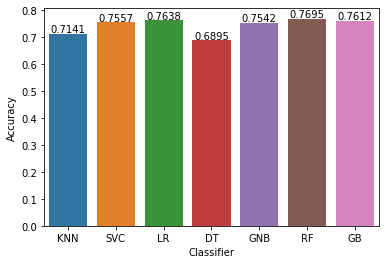

In [42]:
axis = sns.barplot(x='Name', y='Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha='center')
    
plt.show()

In [43]:
from sklearn.feature_selection import RFECV

logreg_model = LogisticRegression(solver='lbfgs', max_iter=4000)

rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(x, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=4000,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

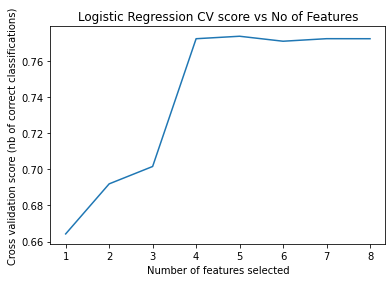

In [44]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [45]:
feature_importance = list(zip(feature_names, rfecv.support_))

new_features = []

for key, value in enumerate(feature_importance):
    if(value[1] == True):
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [46]:
x_new = diabetes_mod[new_features]

initial_score = cross_val_score(logreg_model, x, y, cv=strat_k_fold, scoring='accuracy').mean()
print('Initial accuracy:', initial_score)

fe_score = cross_val_score(logreg_model, x_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print('Accuracy after Feature Selection:', fe_score)

Initial accuracy: 0.7721651445966514
Accuracy after Feature Selection: 0.77353500761035


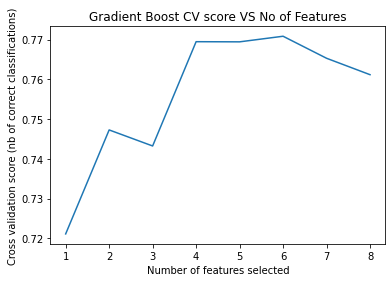

In [47]:

gb_model = GradientBoostingClassifier()

gb_rfecv = RFECV(estimator=gb_model, step=1, cv=strat_k_fold, scoring='accuracy')
gb_rfecv.fit(x, y)

plt.figure()
plt.title('Gradient Boost CV score VS No of Features')
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(gb_rfecv.grid_scores_)+1), gb_rfecv.grid_scores_)
plt.show()

In [48]:
feature_importance = list(zip(feature_names, gb_rfecv.support_))

new_features = []

for key, value in enumerate(feature_importance):
    if(value[1] == True):
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [49]:

x_new_gb = diabetes_mod[new_features]

initial_score = cross_val_score(gb_model, x, y, cv=strat_k_fold, scoring='accuracy').mean()
print('Initial accuracy:', initial_score)

fe_score = cross_val_score(gb_model, x_new_gb, y, cv=strat_k_fold, scoring='accuracy').mean()
print('Accuracy after Feature Selection', fe_score)

Initial accuracy: 0.7625380517503805
Accuracy after Feature Selection 0.7790525114155251


In [53]:
c_values = list(np.arange(1, 10))

param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver': ['liblinear'], 'multi_class': ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver': ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class': ['ovr']}
]

In [54]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=strat_k_fold, scoring='accuracy', iid=False)

In [57]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

initial_score = cross_val_score(logreg_new, x_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print('Final accuracy:', initial_score*100, "%")

Final accuracy: 77.62747336377474 %
